In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
cleaned_data = pd.read_csv("cleaned_train.csv")
#encode categorical features
cleaned_data_encoded = pd.get_dummies(cleaned_data)
X = cleaned_data_encoded.drop(columns=['Item_Outlet_Sales'])  # Features
y = cleaned_data_encoded['Item_Outlet_Sales']  # Target variable
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions on the testing data
predictions = model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 944.2071979835648
Mean Squared Error: 1622299.6084556275
R-squared: 0.40312087010029685


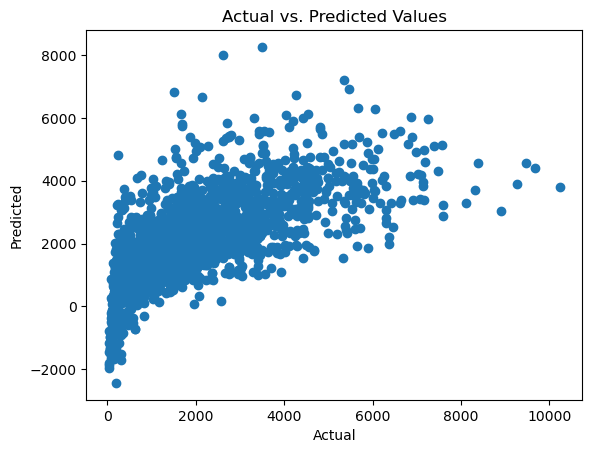

In [2]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()